# Introduction

This project is concerned with the development and implementation of a predictive model for a real estate company with a view to identifying undervalued properties in the Nashville area. The project presents a detailed analysis of various property-related variables, with a particular focus on the 'Sale Price Compared to Value'. It outlines the steps taken from data collection and preprocessing to the application of advanced machine learning techniques. The objective is to provide the real estate company with the capability to make strategic investment decisions based on predictive insights that identify potential investment opportunities in properties priced below their market value.


# Problem Statement

Develop a predictive model for a real estate company to identify undervalued properties in the Nashville area by analyzing the variable 'Sale Price Compared to Value', which will enable the company to make strategic investment decisions.

# Data Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('housing_price.csv')
print(df.head(5))
print(f"Number of rows and columns in the dataset: {df.shape}")
print(f"The data types of feature: {df.dtypes}" )

   Unnamed: 0        Parcel ID       Land Use   Property Address  \
0           1  105 11 0 080.00  SINGLE FAMILY   1802  STEWART PL   
1           2  118 03 0 130.00  SINGLE FAMILY  2761  ROSEDALE PL   
2           3  119 01 0 479.00  SINGLE FAMILY  224  PEACHTREE ST   
3           4  119 05 0 186.00  SINGLE FAMILY      316  LUTIE ST   
4           5  119 05 0 387.00  SINGLE FAMILY   2626  FOSTER AVE   

   Suite/ Condo   # Property City  Sale Date  Sale Price   Legal Reference  \
0               NaN     NASHVILLE  1/11/2013      191500  20130118-0006337   
1               NaN     NASHVILLE  1/18/2013      202000  20130124-0008033   
2               NaN     NASHVILLE  1/18/2013       32000  20130128-0008863   
3               NaN     NASHVILLE  1/23/2013      102000  20130131-0009929   
4               NaN     NASHVILLE   1/4/2013       93736  20130118-0006110   

  Sold As Vacant  ... Building Value Finished Area Foundation Type  \
0             No  ...         134400    1149.00000  

- The dataset comprises 22,539 rows with details across 27 features. These include property type, address, sale price, construction details, and a key variable indicating whether the sale price is over, under, or fairly matched with the assessed value. The dataset is predominantly composed of numeric and categorical data.

# Data Cleaning and Preparation

## Check Missing Value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22539 entries, 0 to 22538
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22539 non-null  int64  
 1   Parcel ID                          22539 non-null  object 
 2   Land Use                           22539 non-null  object 
 3   Property Address                   22537 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22537 non-null  object 
 6   Sale Date                          22539 non-null  object 
 7   Sale Price                         22539 non-null  int64  
 8   Legal Reference                    22539 non-null  object 
 9   Sold As Vacant                     22539 non-null  object 
 10  Multiple Parcels Involved in Sale  22539 non-null  object 
 11  City                               22539 non-null  obj

In [6]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22539
Property City                            2
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            0
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms   

- The "Suite/ Condo #" column is empty, and there are minor missing values in the "Property Address", "Property City", and "Foundation Type" columns that need to be addressed before analysis.

## Handle Missing values

- In order to address the issue of missing data,the median values were imputed for numerical columns including 'Finished Area', 'Bedrooms', 'Full Bath' and 'Half Bath'. Furthermore, the mode was imputed for the categorical column 'Foundation Type'. 

In [7]:
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].median())
df['Foundation Type'] = df['Foundation Type'].fillna(df['Foundation Type'].mode())
df['Bedrooms']= df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Full Bath']= df['Full Bath'].fillna(df['Full Bath'].median())
df['Half Bath']= df['Half Bath'].fillna(df['Half Bath'].median())

- Removes several columns deemed unimportant for the analysis.

In [8]:
# drop some unimportant columns.
df = df.drop(['Unnamed: 0','Parcel ID','Property Address','Property City','Suite/ Condo   #','Legal Reference','City','State','Tax District','Neighborhood'], axis = 1)


- The objective is to enhance the usability and analytical value of the dataset by transforming the "Sale Date" into separate, more actionable components (year, month, and day). 

In [9]:
# convert "Sale Date" to datetime.
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

df['Sale Year'] = df['Sale Date'].dt.year
df['Sale Month'] = df['Sale Date'].dt.month
df['Sale Day'] = df['Sale Date'].dt.day
df.drop('Sale Date', axis=1, inplace=True)


- Transform categorical text data into numerical format using the technique of label encoding. This conversion is of paramount importance for the preparation of the dataset for model construction.

In [10]:
# use Label Encoding convert the object column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Land Use','Sold As Vacant', 'Multiple Parcels Involved in Sale', 
                     'Foundation Type', 'Exterior Wall', 'Grade', 'Sale Price Compared To Value']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [11]:
# check the dataset again
df.head(5)

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sale Year,Sale Month,Sale Day
0,3,191500,0,0,0.17,32000,134400,1149.00000,3,1941,0,2,2,1,0,0,2013,1,11
1,3,202000,0,0,0.11,34000,157800,2090.82495,4,2000,1,2,3,2,1,0,2013,1,18
2,3,32000,0,0,0.17,25000,243700,2145.60001,1,1948,1,1,4,2,0,1,2013,1,18
3,3,102000,0,0,0.34,25000,138100,1969.00000,0,1910,3,2,2,1,0,1,2013,1,23
4,3,93736,0,0,0.17,25000,86100,1037.00000,0,1945,3,2,2,1,0,1,2013,1,4


# Explanatory Data Analysis

To further comprehend the dataset's patterns, outliers, and distribution characteristics, it is necessary to employ descriptive statistics, as well as visualization techniques.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Land Use,22539.0,2.837792,0.673885,0.00,3.0,3.00,3.00,3.000000e+00
Sale Price,22539.0,281637.586051,306318.254184,100.00,130000.0,190000.00,329900.00,1.075000e+07
Sold As Vacant,22539.0,0.005945,0.076878,0.00,0.0,0.00,0.00,1.000000e+00
Multiple Parcels Involved in Sale,22539.0,0.020720,0.142447,0.00,0.0,0.00,0.00,1.000000e+00
Acreage,22539.0,0.455548,0.613028,0.04,0.2,0.28,0.46,1.750000e+01
Land Value,22539.0,70221.160477,103043.506879,900.00,22000.0,30000.00,60300.00,1.869000e+06
Building Value,22539.0,172093.441368,189828.247695,1400.00,85500.0,118600.00,187800.00,5.824300e+06
Finished Area,22539.0,1914.461906,1078.007885,450.00,1248.0,1643.50,2213.00,1.972825e+04
Foundation Type,22539.0,0.841253,1.315485,0.00,0.0,0.00,1.00,6.000000e+00
Year Built,22539.0,1961.914193,25.775757,1832.00,1947.0,1959.00,1977.00,2.017000e+03


- The dataset is primarily comprised of real estate transactions for single-family homes in Nashville. The data set displays a considerable range of sale prices and property values, suggesting a distribution that is significantly skewed, with a few high-value outliers.
 
- The majority of properties exhibit moderate construction and material quality, with an average of three bedrooms and one to two bathrooms. The characteristics of transactions indicate that sales involving vacant properties or multiple parcels are rare.

Use boxplots to further check the outliers.

Text(0.5, 1.0, 'Boxplot of Finished Area')

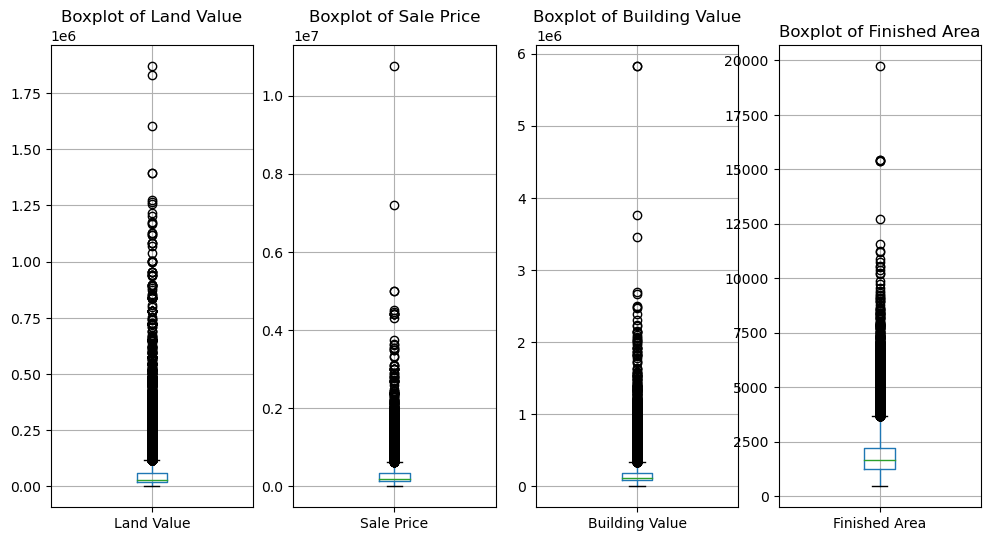

In [13]:
# use boxplot to check the outliers
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
df.boxplot(column="Land Value")
plt.title('Boxplot of Land Value')

plt.subplot(1,4,2)
df.boxplot(column="Sale Price")
plt.title('Boxplot of Sale Price')

plt.subplot(1,4,3)
df.boxplot(column="Building Value")
plt.title('Boxplot of Building Value')

plt.subplot(1,4,4)
df.boxplot(column="Finished Area")
plt.title('Boxplot of Finished Area')

The boxplot illustrates that there are considerable outliers in the variables of land value, sale price, building value, and finished area.

## Distribution of Variables

The utilization of histograms facilitates the identification of trends, outliers, and the overall dispersion of the data.

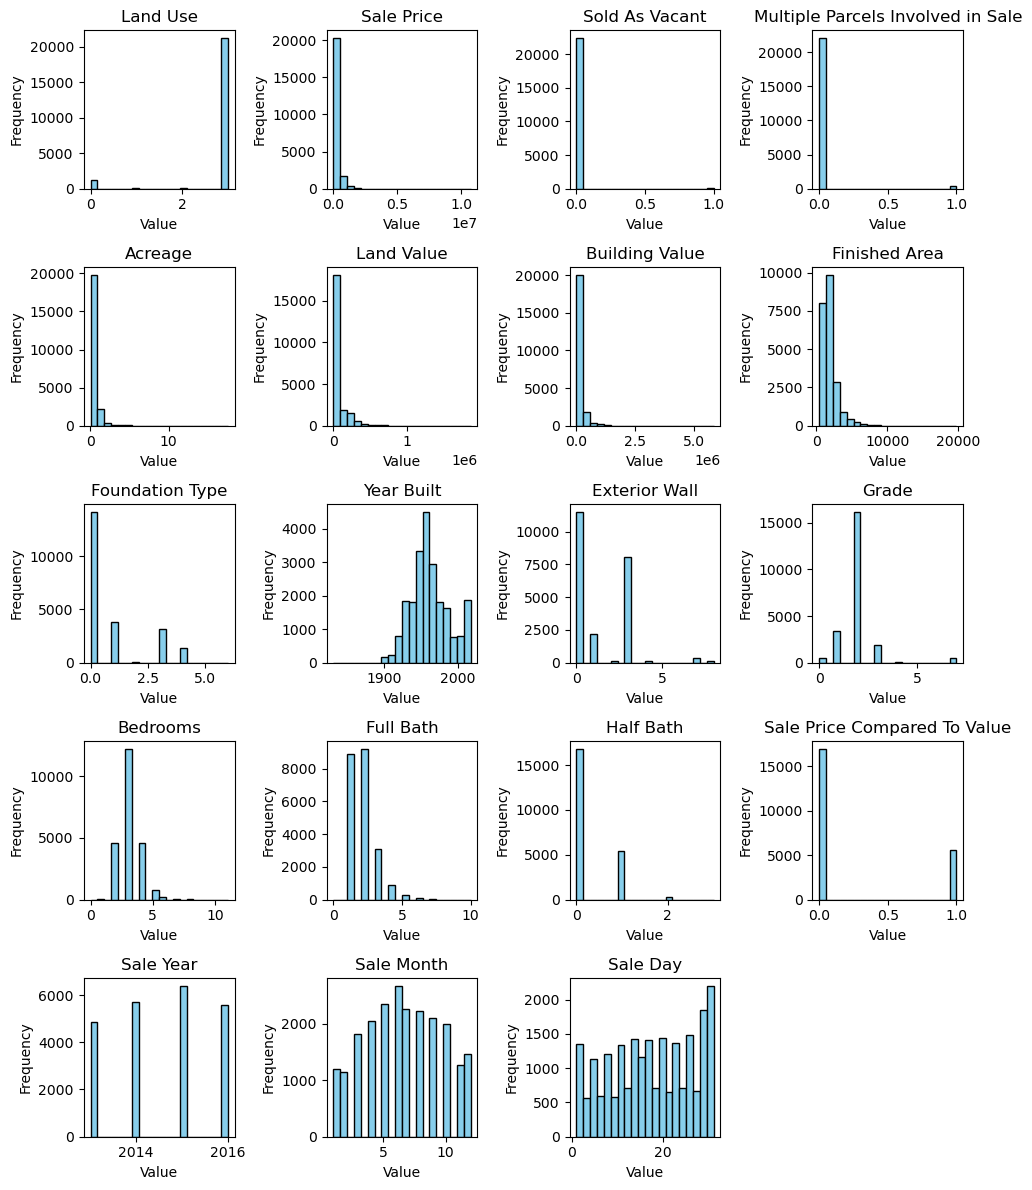

In [14]:
fig, axes = plt.subplots(5, 4, figsize=(10, 12))

# Loop to plot histograms for each variable
for ax, col in zip(axes.flatten(), df):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black') 
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(df.columns):]:
    ax.axis('off')


# adjust the layout between subplots
plt.tight_layout()
plt.show()

- The distribution of the data indicates that the 'Sale Price' primarily clusters around the lower range, with a median sale price of $190,000. However, the data extends to a maximum of $10.75 million, which indicates a highly right-skewed distribution with substantial outliers.

- The majority of houses were constructed during the mid-20th century means that properties are relatively older. The "Sale Price Compared to Value" category suggests a largely equitable assessment, with most values clustered at 0, indicating that most properties are not considered overvalued.

- The distributions of the variables "Sale Price," "Land Value," and "Building Value" are skewed, indicating the presence of extremely high-value outliers.


Removing outliers using the interquartile range method.

In [15]:
def remove_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    print(f'{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

columns = ['Land Value','Sale Price','Building Value', 'Finished Area']


for column in columns:
    df = remove_outliers(df, column)

print("Filtered Data Overview:")
df.describe().T

Land Value - Lower Bound: -35450.0, Upper Bound: 117750.0
Sale Price - Lower Bound: -60000.0, Upper Bound: 420000.0
Building Value - Lower Bound: -21550.0, Upper Bound: 248450.0
Finished Area - Lower Bound: 106.5, Upper Bound: 2894.5
Filtered Data Overview:


,count,mean,std,min,25%,50%,75%,max
Land Use,16450.0,2.832280,0.686595,0.00,3.00,3.00,3.00,3.0
Sale Price,16450.0,171220.369240,79532.618355,100.00,117125.00,156500.00,218000.00,420000.0
Sold As Vacant,16450.0,0.002736,0.052233,0.00,0.00,0.00,0.00,1.0
Multiple Parcels Involved in Sale,16450.0,0.018602,0.135118,0.00,0.00,0.00,0.00,1.0
Acreage,16450.0,0.360980,0.349454,0.04,0.19,0.27,0.39,10.0
Land Value,16450.0,29493.620790,15839.335477,900.00,20400.00,26000.00,34000.00,117000.0
Building Value,16450.0,110284.571429,46786.335161,1600.00,77800.00,101700.00,135600.00,248400.0
Finished Area,16450.0,1506.130124,467.986198,450.00,1150.00,1449.00,1818.00,2892.0
Foundation Type,16450.0,0.736292,1.278717,0.00,0.00,0.00,1.00,5.0
Year Built,16450.0,1961.006809,22.410792,1880.00,1948.00,1959.00,1974.00,2016.0


# Data Correlation

Utilize heatmap to better understand the relationships between variables. 

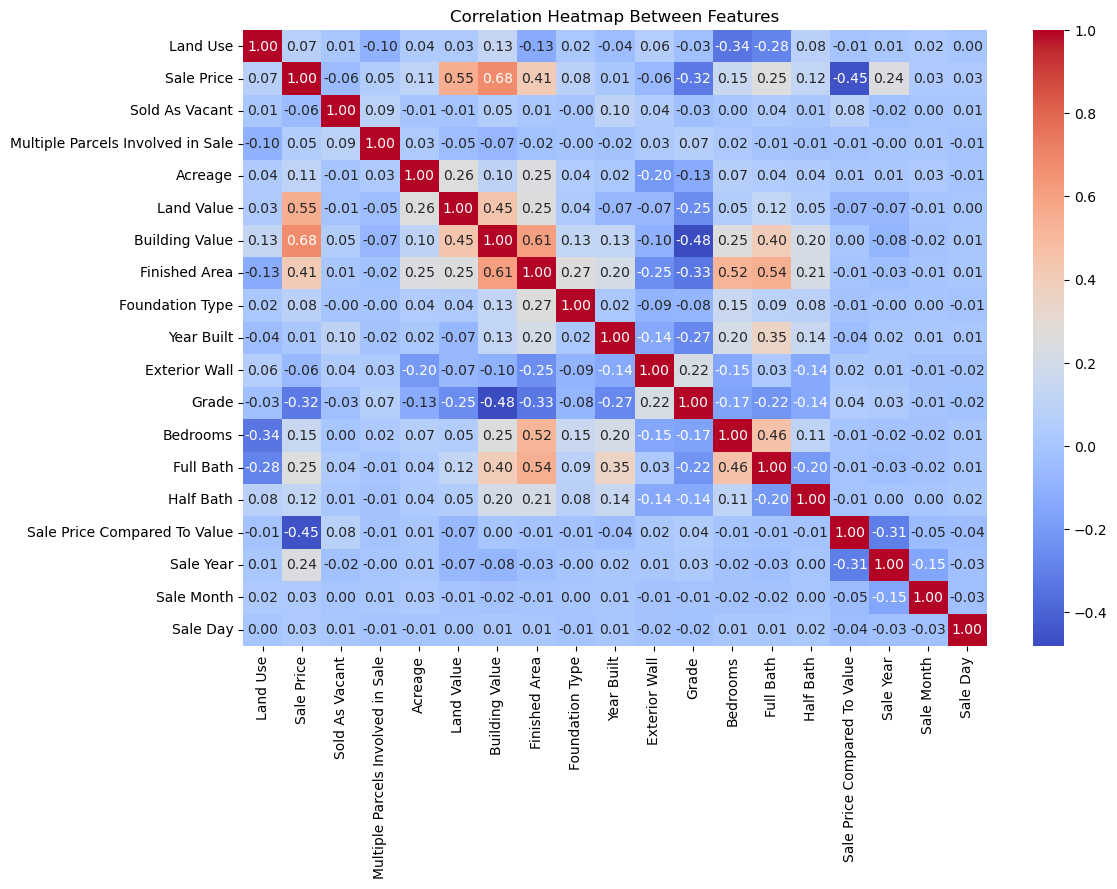

In [16]:
correlation = df.corr(numeric_only = True)

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Features')
plt.show()

- The heatmap reveals that 'Sale Price' exhibits a robust positive correlation with 'Land Value', 'Finished Area', and 'Foundation Type',indicating that properties with higher land values, larger areas, and specific foundation types tend to have higher sale prices.

- Conversely, there is a strong negative correlation between 'Sale Price' and 'Grade', as well as 'Sale Price Compared to Value', indicating that properties evaluated as overpriced and those with lower grades tend to have lower sale prices.

- Additionally, 'Sale Price' shows a relatively weaker positive correlation with 'Bedrooms', 'Full Bath', and 'Sale Year', implying that more spacious homes and recently constructed properties slightly influence higher sale prices.

Based on the previous analysis, split the dataset to use a linear regression model for predicting house prices and use the Decision Tree Model、Random Forest model、Gradient Boost model to predict which properties are being over/under valued.

# Spliting the Data Set

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,classification_report

X = df.drop('Sale Price', axis=1)
y = df['Sale Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((13160, 18), (3290, 18))

#  Linear Model 

In [237]:
# build the Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [238]:
# Predict and evaluate
y_pred_lr = model_lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = model_lr.score(X_test, y_test)
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression R^2: {lr_r2}')

Linear Regression RMSE: 37927.51478617303
Linear Regression R^2: 0.773941293990998


- The linear regression model achieved an R2 value of approximately 0.774, indicating that approximately 77.4% of the variability in house prices can be explained by the model's predictors. 

- The model also exhibits a Root Mean Square Error (RMSE) of 37,927.51, which quantifies the average deviation of the predicted house prices from their actual values. 

- These metrics indicate that the model provides a reasonably accurate and reliable prediction of house prices. However, there is still room for improvement to capture additional variance and reduce prediction errors.

## Feature Importance

In [239]:
# Get the coefficients
coefficients = model_lr.coef_

feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])
feature_importance = feature_importance.abs().sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                                    Coefficient
Sold As Vacant                     84449.337947
Sale Price Compared To Value       68626.103444
Multiple Parcels Involved in Sale  62402.230255
Sale Year                          15036.906628
Acreage                             5731.659552
Grade                               4025.601545
Land Use                            1592.689744
Sale Month                          1238.689783
Bedrooms                            1070.113946
Full Bath                            455.289085
Exterior Wall                        393.824093
Year Built                           172.120094
Foundation Type                      127.533085
Sale Day                             101.347455
Half Bath                             16.408733
Land Value                             1.433265
Building Value                         1.030762
Finished Area                          0.089961


- The linear regression model indicates that the most significant drivers of house prices include the status of the property as vacant, the relationship between the sale price and the assessed value, and the involvement of multiple parcels in a sale. 

- These factors significantly increase property values. These factors indicate a market that is highly responsive to investment potential and development opportunities. 

# Decision Tree Model

In [240]:
from sklearn.tree import DecisionTreeClassifier

X2 = df.drop('Sale Price Compared To Value', axis=1)
y2 = df['Sale Price Compared To Value']

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [243]:
# Initialize and train classifier
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_dt.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Model Evaluation

In [244]:
y_pred_dt_test = model_dt.predict(X2_test)
acc_dt_test = accuracy_score(y2_test, y_pred_dt_test)

y_pred_dt_train = model_dt.predict(X2_train)
acc_dt_train = accuracy_score(y2_train, y_pred_dt_train)


print(f'Decision Tree Test accuracy score: {acc_dt_test}')
print(f'Decision Tree Train accuracy score: {acc_dt_train} \n')
print(classification_report(y2_test, y_pred_dt_test))

Decision Tree Test accuracy score: 0.8857938718662952
Decision Tree Train accuracy score: 0.8966567995821 

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2171
           1       0.82      0.68      0.74       701

    accuracy                           0.89      2872
   macro avg       0.86      0.82      0.84      2872
weighted avg       0.88      0.89      0.88      2872



- The Decision Tree model exhibited satisfactory performance, with a training accuracy of 89.7% and a slightly lower test accuracy of 88.6%,suggesting a good fit to the data with no overfitting.

- For properties classified as undervalued (label 0), the model achieves a precision of 90%, a recall of 95%, and an F1-score of 93%, indicating high accuracy in correctly identifying undervalued properties while minimizing false positives. 

- For overvalued properties (label 1), the precision is 82%, recall is 68%, and F1-score is 74%, reflecting that while the model is reasonably accurate in detecting overvalued properties, it is less reliable and tends to miss a significant number of overvalued cases (lower recall).

# Random Forest Model

In [249]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=0)

# fit the model
model_rfc.fit(X2_train, y2_train)

RandomForestClassifier(random_state=0)

In [250]:
y_pred_rfc_test = model_rfc.predict(X2_test)
acc_rfc_test = accuracy_score(y2_test, y_pred_rfc_test)

y_pred_rfc_train = model_rfc.predict(X2_train)
acc_rfc_train = accuracy_score(y2_train, y_pred_rfc_train)


print(f'Random Forest Test accuracy score: {acc_rfc_test}')
print(f'Random Forest Train accuracy score: {acc_rfc_train}\n')
print(classification_report(y2_test, y_pred_rfc_test))

Random Forest Test accuracy score: 0.9453342618384402
Random Forest Train accuracy score: 1.0

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2171
           1       0.95      0.81      0.88       701

    accuracy                           0.95      2872
   macro avg       0.95      0.90      0.92      2872
weighted avg       0.95      0.95      0.94      2872



- The Random Forest model exhibits optimal performance, with a perfect training accuracy score of 1.0 and a high test accuracy of 94.5%. This indicates a potential overfitting issue.

- For undervalued properties (label 0), the model achieved a precision of 94% and a recall of 99%, resulting in an F1-score of 96%. This indicates that the model is highly effective at correctly identifying and classifying undervalued properties with a low number of false negatives.

- For overvalued properties (label 1), the model maintains a high precision of 95% but a lower recall of 81%, resulting in an F1-score of 88%. This indicates that while the model is accurate in predicting when a property is overvalued (few false positives), it fails to identify a notable proportion of overvalued properties (higher false negatives).

# XGradient Boost Model

In [231]:
import xgboost as xgb
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.09,
    subsample=0.7, 
    max_depth=2,
)
model_xgb.fit(X2_train , y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [251]:
y_pred_xgb_test = model_xgb.predict(X2_test)
acc_xgb_test = accuracy_score(y2_test, y_pred_xgb_test)

y_pred_xgb_train = model_xgb.predict(X2_train)
acc_xgb_train = accuracy_score(y2_train, y_pred_xgb_train)


print(f'XGradient Boost Test accuracy score: {acc_xgb_test}')
print(f'XGradient Boost Train accuracy score: {acc_xgb_train}\n')
print(classification_report(y2_test, y_pred_xgb_test))

XGradient Boost Test accuracy score: 0.9899025069637883
XGradient Boost Train accuracy score: 0.9868535608566951

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2171
           1       0.99      0.97      0.98       701

    accuracy                           0.99      2872
   macro avg       0.99      0.98      0.99      2872
weighted avg       0.99      0.99      0.99      2872



- The XGradient Boost model demonstrates exceptional accuracy and consistency, achieving a training accuracy of 98.7% and a test accuracy of nearly 99%, indicating excellent generalization capabilities.

- For undervalued properties (label 0), the model achieves nearly perfect scores with a precision of 99%, a recall of 100%, and an F1-score of 99%. This highlights its ability to correctly identify and classify almost all undervalued properties without false negatives.

- For overvalued properties (label 1), the model also performs remarkably well, achieving a precision of 99%, a recall of 97%, and an F1-score of 98%. These scores indicate high accuracy in predicting overvalued properties with minimal false positives and very few missed cases.

# Comparing Three Models

- Among the three predictive models, the XGradient Boost model emerges as the most superior, achieving an exceptional test accuracy of 98.9% compared to 88.6% for the Decision Tree and 94.5% for the Random Forest.

- Notably, the XGradient Boost also exhibits the highest precision and recall across both undervalued and overvalued properties, with scores nearly reaching perfection (99% precision, 97-100% recall).

- While the Random Forest model demonstrates robust performance with 95% precision and 81-99% recall, it suggests the potential for overfitting, as evidenced by a perfect 100% training accuracy.

- The decision tree exhibits the lowest test accuracy and a moderate recall of 68% for overvalued properties, indicating a lack of reliability. 

- Consequently, the XGradient Boost model is the optimal choice for reliable property valuation analytic.

# Conclusion

The analysis and modeling efforts conducted in this project have yielded a powerful tool, the XGradient Boost model, which exhibits exceptional capacity to identify undervalued properties within the Nashville real estate market. This predictive capability is of paramount importance for a real estate company seeking to strategically enhance its investment portfolio. By concentrating investments on these undervalued properties, the company can secure a substantial capital appreciation as market prices adjust to reflect the true value of the properties. Furthermore, the model assists in the avoidance of overvalued properties, thereby reducing investment risks and enhancing overall returns. In order to facilitate future strategic decision-making, it is recommended that the company continuously update the dataset and model in order to adapt to evolving market dynamics.